> House Price Prediction project from "Hands-on Machine Learning" book

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if os.path.isdir(housing_path):
      return

    os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [ ]:
def load_housing_data(housing_url = HOUSING_PATH):
  csv_path = os.path.join(HOUSING_PATH,"housing.csv")
  return pd.read_csv(csv_path)

housing_dataset = load_housing_data()
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

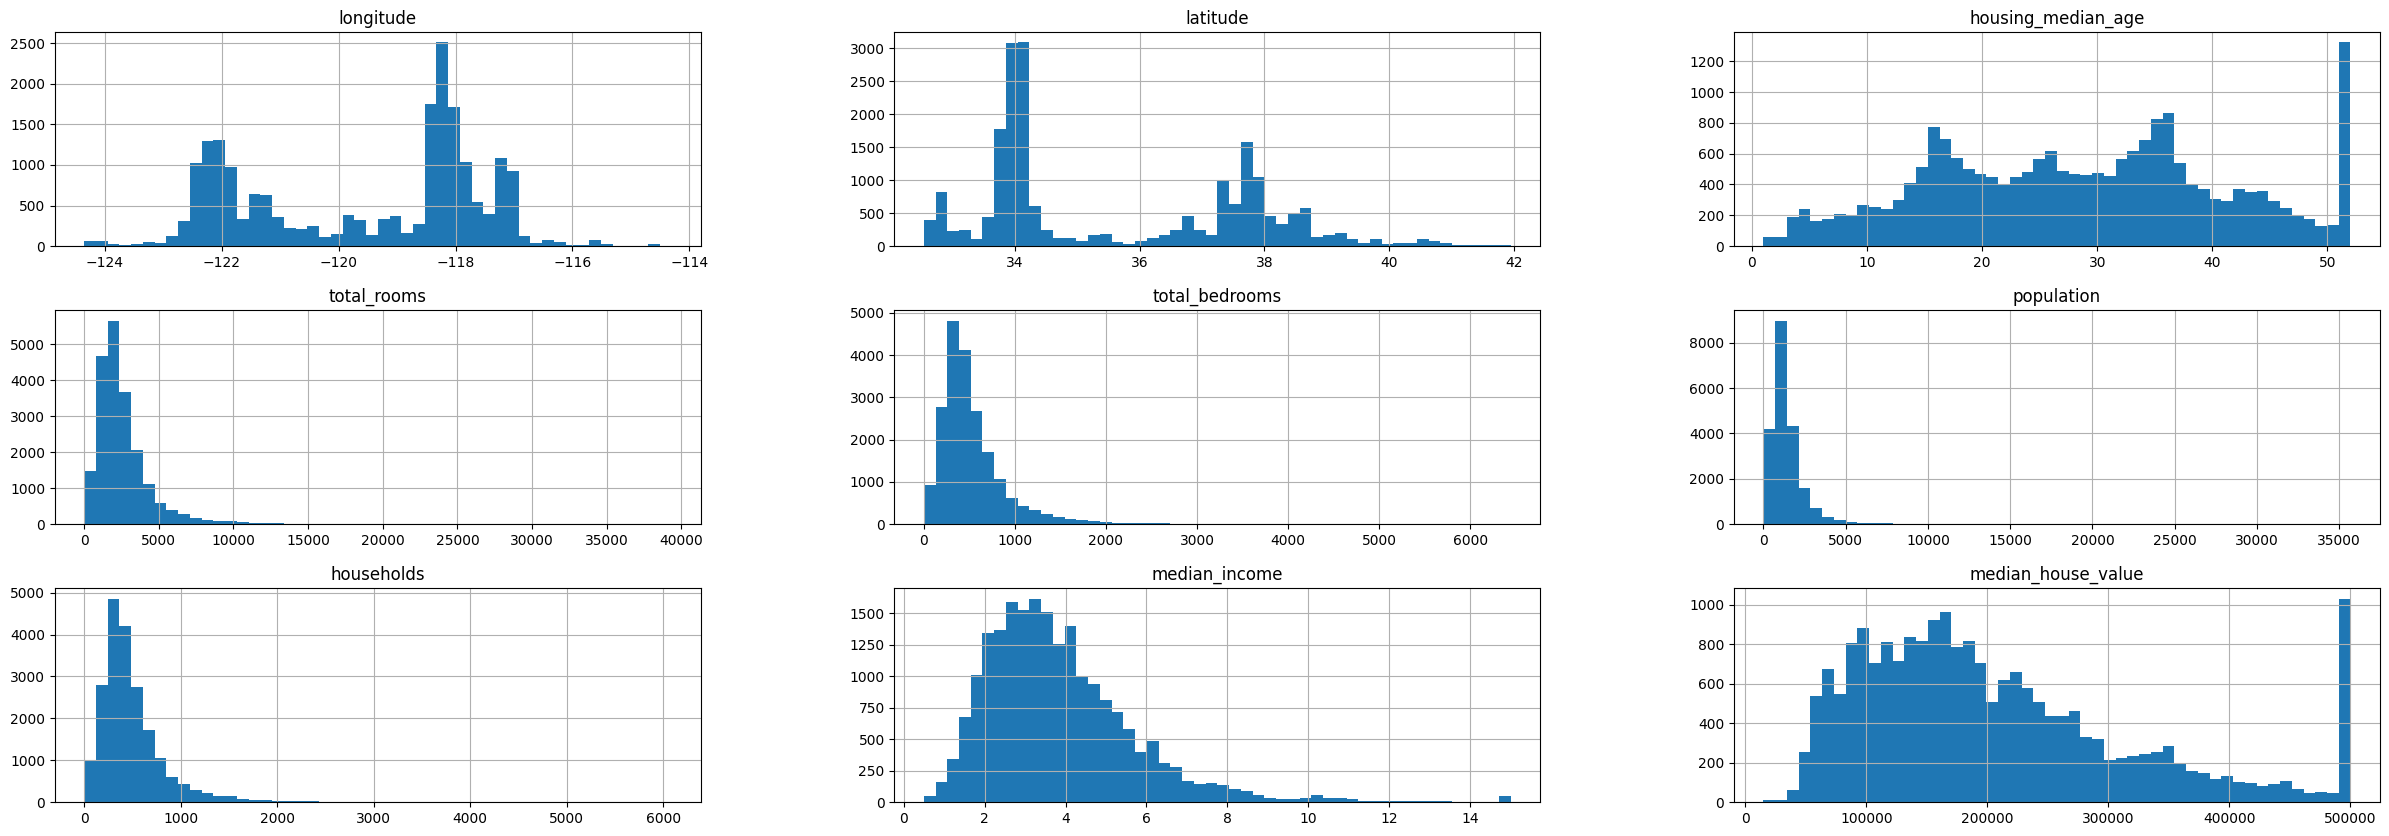

In [ ]:
housing_dataset.hist(bins=50, figsize=(30,10))

In [ ]:
# from zlib import crc32

# def is_test_set(id, test_ratio):
#   crc_value = crc32(np.int64(id)) & 0xffffffff
#   return  crc_value < test_ratio * 2**32

# def split_dataset(dataset, test_ratio, id_column):
#   all_id = dataset[id_column]
#   test_set_bool = all_id.apply(lambda id: is_test_set(id, test_ratio))
#   return dataset.loc[~test_set_bool], dataset.loc[test_set_bool]

# housing_dataset["id"] = housing_dataset["longitude"]*1000+housing_dataset["latitude"]
# train_set, test_set= split_dataset(housing_dataset, 0.2, "id")
# len(train_set)/len(housing_dataset)
# housing_dataset["id"].hist(bins=50)

<Axes: >

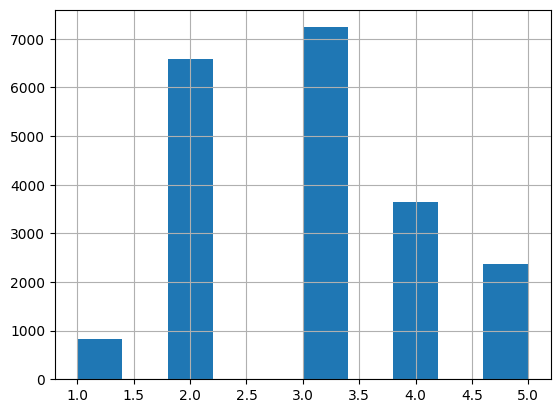

In [ ]:
bins = [0,1.5,3,4.5,6, np.inf]
housing_dataset["income_cat"]=pd.cut(housing_dataset["median_income"], bins, labels = [1,2,3,4,5])
housing_dataset["income_cat"].hist()

In [ ]:
from  sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing_dataset,housing_dataset["income_cat"]):
  train_set = housing_dataset.loc[train_index]
  test_set = housing_dataset.loc[test_index]

for set_ in (train_set, test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing_dataset = train_set.copy()
housing_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


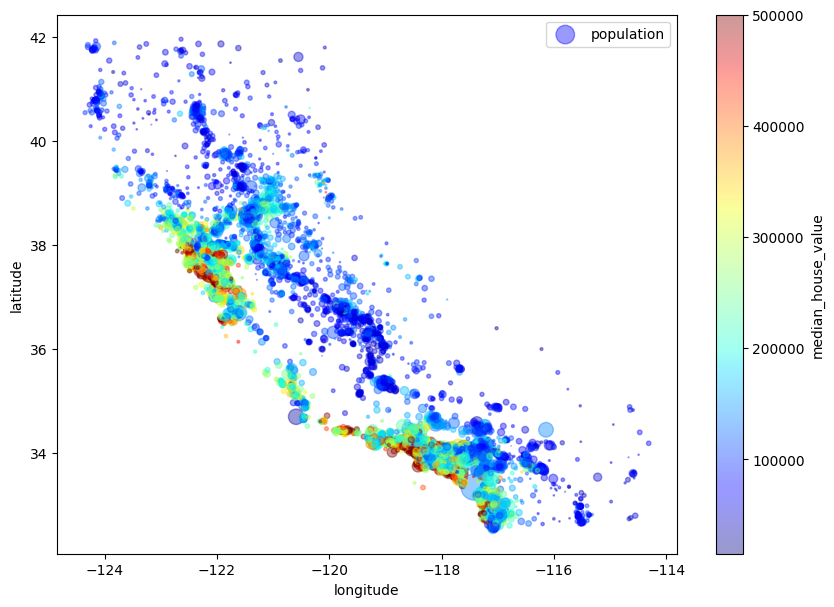

In [ ]:
housing_dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing_dataset["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
pearson_corr = housing_dataset.corr()
pearson_corr["median_house_value"].sort_values(ascending=False)

<ipython-input-11-4f7a241d3644>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = housing_dataset.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

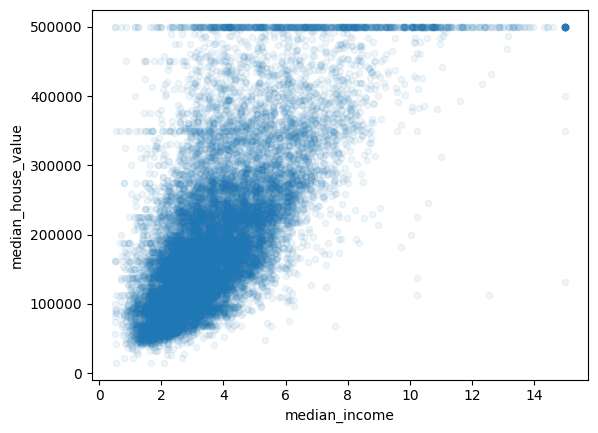

In [ ]:
housing_dataset.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.07)

In [ ]:
housing_dataset["rooms_per_household"] = housing_dataset["total_rooms"]/housing_dataset["households"]
housing_dataset["bedrooms_per_room"] = housing_dataset["total_bedrooms"]/housing_dataset["total_rooms"]
housing_dataset["population_per_household"] = housing_dataset["population"]/housing_dataset["households"]

pearson_corr = housing_dataset.corr()
pearson_corr["median_house_value"].sort_values(ascending=False)

<ipython-input-13-412046a66923>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = housing_dataset.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing_dataset = train_set.drop("median_house_value", axis=1)
housing_dataset_targets = train_set["median_house_value"].copy();

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_col, bedrooms_col, population_col, household_col = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__ (self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    population_per_household = X[:, rooms_col]/X[:, household_col]
    rooms_per_household = X[:, rooms_col]/X[:, household_col]
    if (self.add_bedrooms_per_room):
      bedrooms_per_room = X[:, bedrooms_col]/X[:, rooms_col]
      return np.c_[X,population_per_household,rooms_per_household,bedrooms_per_room]
    else:
      return np.c_[X,population_per_household,rooms_per_household]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_dataset_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

housing_dataset_numerical = housing_dataset.drop("ocean_proximity",axis=1)

num_atr = list(housing_dataset_numerical)
cat_atr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_dataset_pipeline,num_atr),
    ('cat',OneHotEncoder(),cat_atr)
])

housing_dataset_processed = full_pipeline.fit_transform(housing_dataset)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(housing_dataset_processed,housing_dataset_targets)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
train_sample = housing_dataset_processed[:5]
train_sample_targets = housing_dataset_targets.iloc[:5]
lin_reg_predictions = lin_reg_model.predict(train_sample)
lin_reg_mse= mean_squared_error(train_sample_targets,lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

47081.29897685101

In [ ]:
def display_cv_scores(scores):
  print(f"Scores: {scores} \nMean: {scores.mean()} \nStandard Dev.: {scores.std()}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_dataset_processed,housing_dataset_targets)

tree_reg_predictions = tree_reg.predict(housing_dataset_processed)
tree_reg_mse = mean_squared_error(housing_dataset_targets,tree_reg_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg,housing_dataset_processed,housing_dataset_targets,
                         scoring = "neg_mean_squared_error", cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-tree_scores)
display_cv_scores(tree_rmse_scores)

Scores: [71724.35527847 67815.28383213 67908.39116566 70936.77028676
 67487.94491747 71160.44083676 72334.50992539 67394.7141465
 66848.49970687 73962.79546055] 
Mean: 69757.37055565456 
Standard Dev.: 2407.0782720375532


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_dataset_processed, housing_dataset_targets)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_dataset_processed, housing_dataset_targets,
                                scoring="neg_mean_squared_error", cv=10)

In [ ]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_cv_scores(forest_rmse_scores)

Scores: [51380.10855711 49455.0588695  46581.6622966  51707.98330329
 47834.5111382  50424.84288986 51257.31398769 49233.95202206
 47262.63580042 53285.26176518] 
Mean: 49842.333062992104 
Standard Dev.: 2046.4339847749839


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_dataset_processed,housing_dataset_targets)

grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cv_results = grid_search.cv_results_
grid_search.cv_results_

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
  print(np.sqrt(-mean_score),params)

67380.95930935619 {'max_features': 2, 'n_estimators': 3}
57962.42578190135 {'max_features': 2, 'n_estimators': 10}
55649.227793338556 {'max_features': 2, 'n_estimators': 30}
62260.96289283875 {'max_features': 4, 'n_estimators': 3}
54978.28050071989 {'max_features': 4, 'n_estimators': 10}
52426.955281958144 {'max_features': 4, 'n_estimators': 30}
61404.066220555964 {'max_features': 6, 'n_estimators': 3}
54142.09582194912 {'max_features': 6, 'n_estimators': 10}
51694.17770244315 {'max_features': 6, 'n_estimators': 30}
61077.702712858605 {'max_features': 8, 'n_estimators': 3}
53259.2813400046 {'max_features': 8, 'n_estimators': 10}
51104.35951173787 {'max_features': 8, 'n_estimators': 30}
65075.559671536656 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56575.34600667784 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63313.43009248921 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
55017.10096738497 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1,high=100),
    'max_features': randint(low=1,high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
randomized_search = RandomizedSearchCV(forest_reg,param_distributions = param_distribs, n_iter=10, cv=5, scoring = "neg_mean_squared_error",random_state=42)
randomized_search.fit(housing_dataset_processed,housing_dataset_targets)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6cc23b39d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6cc24e6680>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rand_cv_results = randomized_search.cv_results_

for mean_score, params in zip(rand_cv_results["mean_test_score"], rand_cv_results["params"]):
  print(np.sqrt(-mean_score),params)

50881.97982033854 {'max_features': 7, 'n_estimators': 52}
53232.770213732874 {'max_features': 5, 'n_estimators': 15}
52862.03390989671 {'max_features': 3, 'n_estimators': 72}
52610.13909841306 {'max_features': 5, 'n_estimators': 21}
50543.28576641245 {'max_features': 7, 'n_estimators': 83}
50606.05266951033 {'max_features': 7, 'n_estimators': 75}
52703.33916800775 {'max_features': 3, 'n_estimators': 88}
52509.472327949516 {'max_features': 5, 'n_estimators': 24}
54299.647082073876 {'max_features': 3, 'n_estimators': 22}
68041.21245541588 {'max_features': 5, 'n_estimators': 2}


In [ ]:
final_model = randomized_search.best_estimator_

X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

X_test_processed = full_pipeline.transform(X_test)

predictions = final_model.predict(X_test_processed)

final_mse = mean_squared_error(predictions,y_test)
final_rmse = np.sqrt(final_mse)

final_rmse

48073.02689084447

In [ ]:
X_train_processed = full_pipeline.fit_transform(train_set.drop("median_house_value",axis=1))
y_train = train_set["median_house_value"].copy()
y_train

X_test_processed = full_pipeline.transform(test_set.drop("median_house_value",axis=1))
y_test = test_set["median_house_value"].copy()

final_params = randomized_search.best_params_
final_model = RandomForestRegressor(max_features = 7, n_estimators=83)


final_model.fit(X_train_processed,y_train)

predictions = final_model.predict(X_test_processed)

final_mse = mean_squared_error(predictions,y_test)
final_rmse = np.sqrt(final_mse)

final_rmse

47931.000276912215